<a href="https://colab.research.google.com/github/PeterLOVANAS/Titanic-machine-learning-project/blob/main/Copy_of_Copy_of_Titanic_firstML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import math
import pandasql as ps
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import shuffle


In [79]:
data = pd.read_csv('https://raw.githubusercontent.com/PeterLOVANAS/Titanic-machine-learning-project/main/datasets/Titanic_dataset_com.csv')
ps.sqldf("""SELECT 
    *
    FROM data
""")

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306.0,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,1307.0,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,1308.0,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None
1308,1309.0,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,None,S,None,NaN,None


# **Data Preprocessing**

## Training datasets (Without normalization)

In [80]:
print(data["embarked"].drop_duplicates())
print(data["cabin"].drop_duplicates())

0        S
9        C
168    NaN
206      Q
Name: embarked, dtype: object
0            B5
1       C22 C26
5           E12
6            D7
7           A36
         ...   
1025       E121
1122      F E69
1131        E10
1187         G6
1249        F38
Name: cabin, Length: 187, dtype: object


In [81]:
df = data.copy()
df["sex"] =  df["sex"].apply(lambda x : 1 if x == "male" else 0)
df["sex"]

0       0
1       1
2       0
3       1
4       0
       ..
1305    0
1306    1
1307    1
1308    1
1309    0
Name: sex, Length: 1310, dtype: int64

In [82]:
df.isnull().sum()

PassengerId       1
pclass            1
survived          1
name              1
sex               0
age             264
sibsp             1
parch             1
ticket            1
fare              2
cabin          1015
embarked          3
boat            824
body           1189
home.dest       565
dtype: int64

In [83]:
df["age"] = df["age"].fillna(np.mean(df["age"]))
df.isnull().sum()

PassengerId       1
pclass            1
survived          1
name              1
sex               0
age               0
sibsp             1
parch             1
ticket            1
fare              2
cabin          1015
embarked          3
boat            824
body           1189
home.dest       565
dtype: int64

In [84]:
df["embarked"] = data.copy()["embarked"]
df["embarked"].fillna("S", inplace = True)

def replace_embarked(x):
  if x == "S":
    return 0
  elif x == "C":
    return 1
  elif x == "Q":
    return 2
df["embarked"]  = df["embarked"].apply(replace_embarked)
print(df["embarked"].head())

0    0
1    0
2    0
3    0
4    0
Name: embarked, dtype: int64


In [85]:
df["cabin"] = data.copy()["cabin"]
df["cabin"].fillna("G6",  inplace= True)

set_val = set()
for i in df.index:
  set_val.add(df["cabin"][i][0])
set_val = sorted(set_val)
ind_lst = list(range(len(set_val)))
dic_cabin = {set_val[i]: ind_lst[i] for i in range(len(set_val))}
print(dic_cabin)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}


In [86]:
def replace_cabin(x):
  return dic_cabin[x[0]]
df["cabin"] = df["cabin"].apply(replace_cabin)
print(df["cabin"].head())

0    1
1    2
2    2
3    2
4    2
Name: cabin, dtype: int64


In [87]:
df = df.drop(1309)
df

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.000000,0.0,0.0,24160,211.3375,1,0,2,NaN,"St Louis, MO"
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.916700,1.0,2.0,113781,151.5500,2,0,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.000000,1.0,2.0,113781,151.5500,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1.0,2.0,113781,151.5500,2,0,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1.0,2.0,113781,151.5500,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305.0,3.0,0.0,"Zabour, Miss. Hileni",0,14.500000,1.0,0.0,2665,14.4542,6,1,NaN,328.0,NaN
1305,1306.0,3.0,0.0,"Zabour, Miss. Thamine",0,29.881135,1.0,0.0,2665,14.4542,6,1,NaN,NaN,NaN
1306,1307.0,3.0,0.0,"Zakarian, Mr. Mapriededer",1,26.500000,0.0,0.0,2656,7.2250,6,1,NaN,304.0,NaN
1307,1308.0,3.0,0.0,"Zakarian, Mr. Ortin",1,27.000000,0.0,0.0,2670,7.2250,6,1,NaN,NaN,NaN


In [88]:
dff = df[df["pclass"] == 3]
df["fare"] = df["fare"].fillna(np.mean(dff["fare"]))
df.isnull().sum()

PassengerId       0
pclass            0
survived          0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin             0
embarked          0
boat            823
body           1188
home.dest       564
dtype: int64

In [89]:
df = df.drop(["boat", "body" , "home.dest"] , axis = 1)
df.isnull().sum()

PassengerId    0
pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64

In [90]:
df = shuffle(df)
predicset = df.drop(["survived", "name","ticket","PassengerId"] , axis = 1).values
targetset = to_categorical(df["survived"])

n_col = predicset.shape[1]
print(f"target = \n{targetset}\n")
print(f"predictive features = \n{predicset[:15]}")
print(df.columns)

target = 
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]

predictive features = 
[[  3.           0.          29.88113451   0.           0.
    8.05         6.           0.        ]
 [  3.           1.          25.           0.           0.
    7.225        6.           1.        ]
 [  3.           1.          29.88113451   0.           0.
    7.775        6.           0.        ]
 [  3.           1.          29.88113451   0.           0.
    7.8958       6.           0.        ]
 [  3.           0.          29.88113451   1.           0.
   14.4542       6.           1.        ]
 [  2.           0.          13.           0.           1.
   19.5          6.           0.        ]
 [  1.           1.          41.           0.           0.
   30.5          0.           0.        ]
 [  3.           1.          29.88113451   0.           0.
    7.75         6.           2.        ]
 [  3.           0.          30.           0.           0.
    7.6292       6.           2.       

In [91]:
data.info() # the process is finally over.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 153.6+ KB


In [92]:
# Seperate into train test and validation

predictors = predicset[:892]
target = targetset[:892]
print(len(predictors) == len(target))
print(predictors[:5])

True
[[ 3.          0.         29.88113451  0.          0.          8.05
   6.          0.        ]
 [ 3.          1.         25.          0.          0.          7.225
   6.          1.        ]
 [ 3.          1.         29.88113451  0.          0.          7.775
   6.          0.        ]
 [ 3.          1.         29.88113451  0.          0.          7.8958
   6.          0.        ]
 [ 3.          0.         29.88113451  1.          0.         14.4542
   6.          1.        ]]


In [93]:
# Seperate training data into train and validation
ratio = math.trunc(len(predictors)*0.8)
predictors_train = predictors[:ratio]
predictors_valid = predictors[ratio:]
target_train = target[:ratio]
target_valid = target[ratio:]


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 153.6+ KB


## Training datasets (with normalization)

In [95]:
print(df.columns)

Index(['PassengerId', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [96]:
def normalize(df):
  norm_df = df.copy()
  for name in ['age' ,'fare']:
    max_val = df[name].max()
    min_val = df[name].min()
    norm_df[name] = (norm_df[name] - min_val) / (max_val - min_val)
  return norm_df

In [97]:
df_norm = normalize(df.drop(["name","ticket", "PassengerId"] , axis = 1))
predictors_norm_set = df_norm.drop(["survived"] , axis = 1).values
target_norm_set = to_categorical(df_norm["survived"])




In [98]:
predictors_norm = predictors_norm_set[:892]
target_norm = target_norm_set[:892]
predictors_norm_train = predictors_norm[:ratio]
predictors_norm_valid = predictors_norm[ratio:]
target_norm_train = target_norm[:ratio]
target_norm_valid = target_norm[ratio:]
print(len(predictors_norm_set))
print(len(predictors_norm))

1309
892


In [99]:
print(predictors_norm_train.shape)
print(target_norm_train.shape)

(713, 8)
(713, 2)


## Testing dataset

In [100]:
predictors_test = predicset[892:]
target_test = targetset[892:]

In [101]:
predictors_norm_test = predictors_norm_set[892:]
target_norm_test = target_norm_set[892:]
predictors_norm_test[:5]

array([[3.        , 0.        , 0.56158646, 1.        , 0.        ,
        0.02753757, 6.        , 0.        ],
       [3.        , 1.        , 0.19832952, 0.        , 0.        ,
        0.01571255, 6.        , 0.        ],
       [3.        , 1.        , 0.26096003, 0.        , 0.        ,
        0.01522459, 6.        , 0.        ],
       [3.        , 1.        , 0.26096003, 0.        , 0.        ,
        0.01521639, 6.        , 0.        ],
       [3.        , 1.        , 0.22338172, 0.        , 0.        ,
        0.01521639, 6.        , 0.        ]])

In [102]:
print(predictors_norm_test.shape)
print(target_norm_test.shape)

(417, 8)
(417, 2)


# **Utility**

In [103]:
def plot_loss(hist: dict , style = "ggplot"):
  plt.style.use(style)
  plt.plot(hist['loss'], label = 'loss')
  plt.plot(hist["val_loss"]  ,label = "val loss")
  plt.title("Loss vs Val loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

def plot_accu(hist: dict , style = "ggplot"):
  plt.style.use(style)
  plt.plot(hist['accuracy'], label = 'accuracy')
  plt.plot(hist["val_accuracy"]  ,label = "val accuracy")
  plt.title("Accuracy vs Val accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc = "lower right")
  plt.show()

# **Model V1**



In [104]:
modelV1 = Sequential()
modelV1.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV1.add(Dense(32 , activation = "relu"))
modelV1.add(Dense(2 , activation = "softmax"))

## Attempt 1 

### Training (Attempt 1)

Training without validation data

In [105]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
#model.fit(tf.convert_to_tensor(predictors, dtype=tf.int64)  , tf.convert_to_tensor(target, dtype=tf.int64) )
histV1_1 = modelV1.fit(predictors , target, epochs = 200)

Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 0.9803 - accuracy: 0.6525
Epoch 2/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.6581
Epoch 3/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6519 - accuracy: 0.6469
Epoch 4/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6084 - accuracy: 0.6738
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.6783
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.7029
Epoch 7/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.7152
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7197
Epoch 9/200
28/28 [==============================] - 0s 4ms/step - loss: 0.5308 - accuracy: 0.7265
Epoch 10/200
28/28 [==============================] - 0s 5ms/step - loss: 0.5255 - accuracy: 0.7478
Epoch 11/

### Test (Attempt 1)

In [106]:
test_lost , test_accu = modelV1.evaluate(predictors_test , target_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.7914


## Attempt 2

### Training (Attempt 2)

Training with Validation data

In [107]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV1_2 = modelV1.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200)

Epoch 1/200
23/23 [==============================] - 2s 45ms/step - loss: 0.4643 - accuracy: 0.8022 - val_loss: 0.4896 - val_accuracy: 0.7933
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4030 - accuracy: 0.8261 - val_loss: 0.4205 - val_accuracy: 0.8045
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8275 - val_loss: 0.4105 - val_accuracy: 0.7989
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.3937 - accuracy: 0.8429 - val_loss: 0.4168 - val_accuracy: 0.7933
Epoch 5/200
23/23 [==============================] - 0s 7ms/step - loss: 0.4031 - accuracy: 0.8303 - val_loss: 0.4501 - val_accuracy: 0.8101
Epoch 6/200
23/23 [==============================] - 0s 6ms/step - loss: 0.3969 - accuracy: 0.8387 - val_loss: 0.4234 - val_accuracy: 0.7933
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.3851 - accuracy: 0.8387 - val_loss: 0.4337 - val_accuracy: 0.7933
Epoch 8/200


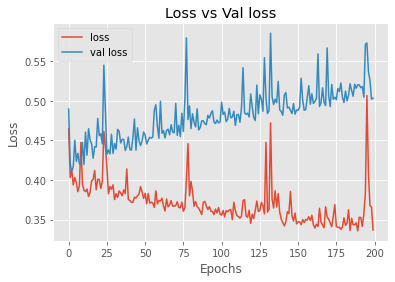

In [108]:
hist_dict_model_1 = histV1_2.history
plot_loss(hist_dict_model_1)

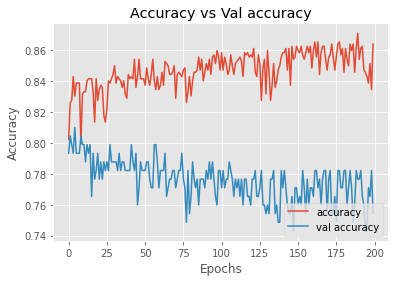

In [109]:
plot_accu(hist_dict_model_1)

### Test (Attempt 2)

In [110]:
test_loss , test_acc = modelV1.evaluate(predictors_test ,target_test)


14/14 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7794


## Attempt 3

### Training (Attempt 3)

Using normalized datasets

In [111]:
print(len(predictors_norm_valid) + len(predictors_norm_train))

892


In [112]:
print(len(predictors_norm_train))

713


In [113]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV1_3 = modelV1.fit(predictors_norm_train , target_norm_train  , validation_data = (predictors_norm_valid, target_norm_valid) , epochs = 200)

Epoch 1/200
23/23 [==============================] - 1s 11ms/step - loss: 2.2314 - accuracy: 0.4292 - val_loss: 0.7141 - val_accuracy: 0.6983
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.6550 - val_loss: 0.6605 - val_accuracy: 0.6536
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6029 - accuracy: 0.7181 - val_loss: 0.5791 - val_accuracy: 0.7430
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5651 - accuracy: 0.7518 - val_loss: 0.5391 - val_accuracy: 0.7542
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5244 - accuracy: 0.7602 - val_loss: 0.5091 - val_accuracy: 0.7709
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7616 - val_loss: 0.4938 - val_accuracy: 0.7765
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.4884 - accuracy: 0.7714 - val_loss: 0.4945 - val_accuracy: 0.7542
Epoch 8/200


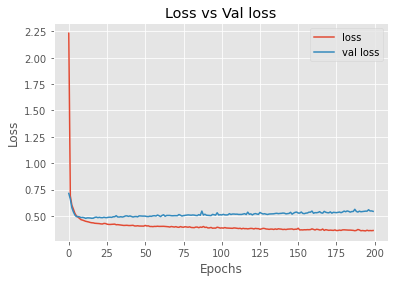

In [114]:
hist_dict_model_3 = histV1_3.history
plot_loss(hist_dict_model_3)

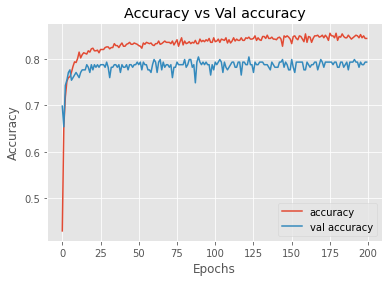

In [115]:
plot_accu(hist_dict_model_3)

### Testing (Attempt 3)

In [116]:
test_loss , test_acc = modelV1.evaluate(predictors_norm_test , target_norm_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7938


# **Model V2**

In [117]:
modelV2 = Sequential()
modelV2.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV2.add(tf.keras.layers.Dropout(0.5))

modelV2.add(Dense(32 , activation = "relu"))
modelV2.add(tf.keras.layers.Dropout(0.5))

modelV2.add(Dense(2 , activation = "softmax"))


## Attempt 1 


### Training (Attempt 1)

Training with pure data

In [118]:
modelV2.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV2_1 = modelV2.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 1s 11ms/step - loss: 6.1259 - accuracy: 0.5288 - val_loss: 0.9150 - val_accuracy: 0.6257
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 4.8144 - accuracy: 0.5302 - val_loss: 0.9024 - val_accuracy: 0.6425
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 3.6026 - accuracy: 0.5849 - val_loss: 0.9026 - val_accuracy: 0.6369
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 3.4762 - accuracy: 0.5512 - val_loss: 0.8600 - val_accuracy: 0.6816
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 3.1965 - accuracy: 0.5344 - val_loss: 0.8594 - val_accuracy: 0.6816
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 2.4732 - accuracy: 0.5722 - val_loss: 0.8011 - val_accuracy: 0.6369
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 2.1572 - accuracy: 0.5568 - val_loss: 0.7709 - val_accuracy: 0.6425
Epoch 8/200


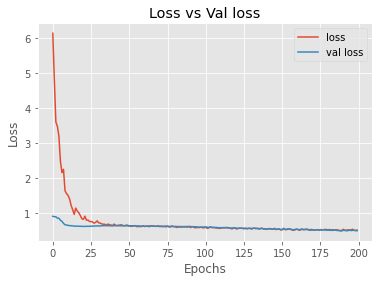

In [119]:
dict_histV2_1 = histV2_1.history
plot_loss(dict_histV2_1)

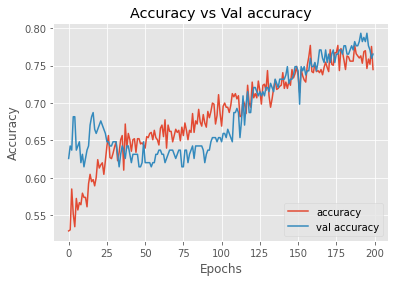

In [120]:
plot_accu(dict_histV2_1)

### Testing (Attempt 1)

In [121]:
test_loss , test_acc = modelV2.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7674


# Model V3

In [122]:
modelV3 = Sequential()
modelV3.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV3.add(BatchNormalization())
modelV3.add(tf.keras.layers.Dropout(0.5))

modelV3.add(Dense(32 , activation = "relu"))
modelV3.add(BatchNormalization())
modelV3.add(tf.keras.layers.Dropout(0.5))

modelV3.add(Dense(2 , activation = "softmax"))

## Attempt 1 

### Training (Attempt 1)

In [123]:
modelV3.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV3_1 = modelV3.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 1s 13ms/step - loss: 1.3881 - accuracy: 0.5288 - val_loss: 2.3426 - val_accuracy: 0.4246
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 1.1989 - accuracy: 0.5428 - val_loss: 1.2809 - val_accuracy: 0.4525
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 1.0181 - accuracy: 0.5820 - val_loss: 0.8642 - val_accuracy: 0.5084
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.9585 - accuracy: 0.5877 - val_loss: 0.7027 - val_accuracy: 0.5698
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.9205 - accuracy: 0.6017 - val_loss: 0.6453 - val_accuracy: 0.6201
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.8630 - accuracy: 0.6255 - val_loss: 0.6210 - val_accuracy: 0.6536
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.9194 - accuracy: 0.5947 - val_loss: 0.6129 - val_accuracy: 0.6536
Epoch 8/200


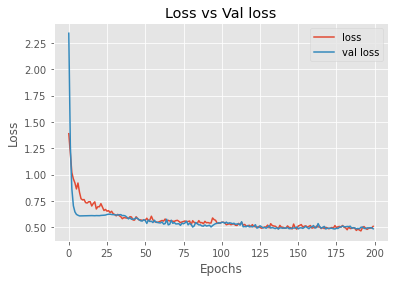

In [124]:
dict_histV3_1 = histV3_1.history
plot_loss(dict_histV3_1)

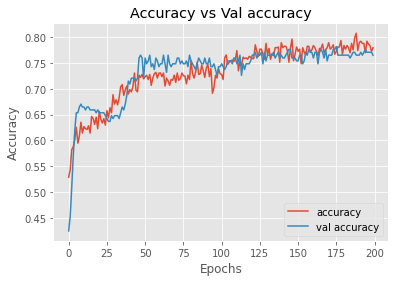

In [125]:
plot_accu(dict_histV3_1)

### Testing (Attempt 1)

In [126]:
test_loss , test_acc = modelV3.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 4ms/step - loss: 0.4557 - accuracy: 0.7986


# Model V4 

In [127]:
modelV4 = Sequential()
modelV4.add(Dense(32, activation = "relu" , input_shape = (n_col ,), kernel_regularizer='l1'))
modelV4.add(BatchNormalization())
modelV4.add(tf.keras.layers.Dropout(0.5))

modelV4.add(Dense(32 , activation = "relu"))
modelV4.add(BatchNormalization())
modelV4.add(tf.keras.layers.Dropout(0.5))

modelV4.add(Dense(2 , activation = "softmax"))

## Training 

In [128]:
modelV4.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV4_1 = modelV4.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 2s 19ms/step - loss: 1.5457 - accuracy: 0.5386 - val_loss: 1.4856 - val_accuracy: 0.4246
Epoch 2/200
23/23 [==============================] - 0s 7ms/step - loss: 1.4555 - accuracy: 0.5428 - val_loss: 1.0966 - val_accuracy: 0.5698
Epoch 3/200
23/23 [==============================] - 0s 8ms/step - loss: 1.3960 - accuracy: 0.5652 - val_loss: 1.0100 - val_accuracy: 0.6369
Epoch 4/200
23/23 [==============================] - 0s 6ms/step - loss: 1.2995 - accuracy: 0.5638 - val_loss: 0.9730 - val_accuracy: 0.6704
Epoch 5/200
23/23 [==============================] - 0s 6ms/step - loss: 1.2103 - accuracy: 0.5764 - val_loss: 0.9544 - val_accuracy: 0.6872
Epoch 6/200
23/23 [==============================] - 0s 6ms/step - loss: 1.1312 - accuracy: 0.5891 - val_loss: 0.9277 - val_accuracy: 0.6816
Epoch 7/200
23/23 [==============================] - 0s 8ms/step - loss: 1.1173 - accuracy: 0.6269 - val_loss: 0.9074 - val_accuracy: 0.6872
Epoch 8/200


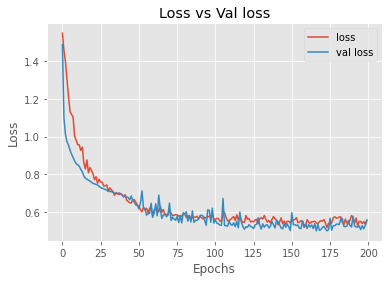

In [129]:
dict_histV4_1 = histV4_1.history
plot_loss(dict_histV4_1)

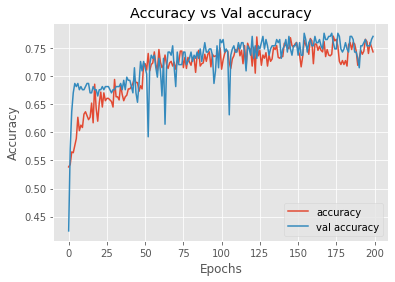

In [130]:
plot_accu(dict_histV4_1)

## Testing

In [131]:
test_loss , test_acc = modelV4.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7938


# Model V5 

In [132]:
modelV5 = Sequential()
modelV5.add(Dense(16, activation = "relu" , input_shape = (n_col ,)))
modelV5.add(BatchNormalization())
modelV5.add(tf.keras.layers.Dropout(0.5))

modelV5.add(Dense(16 , activation = "relu"))
modelV5.add(BatchNormalization())
modelV5.add(tf.keras.layers.Dropout(0.5))

modelV5.add(Dense(16 , activation = "relu"))
modelV5.add(BatchNormalization())
modelV5.add(tf.keras.layers.Dropout(0.5))



modelV5.add(Dense(2 , activation = "softmax"))

## Attempt 1

### Training (Attempt 1)

In [133]:
modelV5.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV5_1 = modelV5.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 1s 13ms/step - loss: 1.2573 - accuracy: 0.4712 - val_loss: 0.7881 - val_accuracy: 0.4078
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 0.9618 - accuracy: 0.5610 - val_loss: 0.7324 - val_accuracy: 0.4804
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 1.0217 - accuracy: 0.5400 - val_loss: 0.6862 - val_accuracy: 0.5587
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 1.0937 - accuracy: 0.5021 - val_loss: 0.6595 - val_accuracy: 0.6313
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.9277 - accuracy: 0.5147 - val_loss: 0.6512 - val_accuracy: 0.6313
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.9372 - accuracy: 0.5344 - val_loss: 0.6455 - val_accuracy: 0.6369
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.8180 - accuracy: 0.5835 - val_loss: 0.6458 - val_accuracy: 0.6313
Epoch 8/200


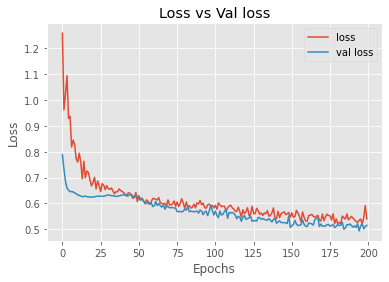

In [134]:
dict_histV5_1 = histV5_1.history
plot_loss(dict_histV5_1)

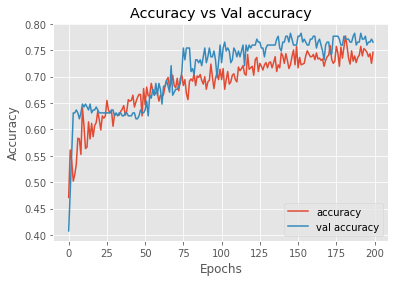

In [135]:
plot_accu(dict_histV5_1)

### Testing (Attempt 1)

In [136]:
test_loss , test_acc = modelV5.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7602


## Attempt 2 

### Training (Attempt 2)

In [137]:
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
modelV5.compile(optimizer = opt, loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV5_2 = modelV5.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )


Epoch 1/200
23/23 [==============================] - 2s 35ms/step - loss: 0.5550 - accuracy: 0.7391 - val_loss: 0.5220 - val_accuracy: 0.7709
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5454 - accuracy: 0.7391 - val_loss: 0.5244 - val_accuracy: 0.7430
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5252 - accuracy: 0.7560 - val_loss: 0.5142 - val_accuracy: 0.7542
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5276 - accuracy: 0.7489 - val_loss: 0.5097 - val_accuracy: 0.7709
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5347 - accuracy: 0.7532 - val_loss: 0.5129 - val_accuracy: 0.7598
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5225 - accuracy: 0.7588 - val_loss: 0.5300 - val_accuracy: 0.7598
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5517 - accuracy: 0.7363 - val_loss: 0.5077 - val_accuracy: 0.7709
Epoch 8/200


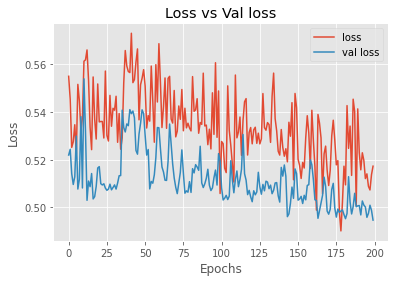

In [138]:
dict_histV5_2 = histV5_2.history
plot_loss(dict_histV5_2)

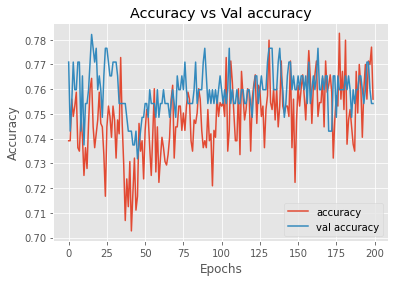

In [139]:
plot_accu(dict_histV5_2)

###Testing (Attempt 2)

In [140]:
test_loss , test_acc = modelV5.evaluate(predictors_test , target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7842


In [141]:
result = modelV5.predict(predictors_test)
print(type(result))
def predict_state(arr):
  lst = []
  for p in arr:
    if p[0] > 0.5:
      lst.append(0) # Died
    elif p[1] > 0.5:
      lst.append(1) # Survived
  return lst

14/14 [==============================] - 0s 2ms/step
<class 'numpy.ndarray'>


In [142]:
output = pd.DataFrame({"PassengerID" : df[892:]["PassengerId"], "Survived (Prediction)" : predict_state(result), "Survived (Real)": df[892:]["survived"].values} )
output # Final result

,PassengerID,Survived (Prediction),Survived (Real)
851,852.0,0,1.0
1161,1162.0,0,0.0
1065,1066.0,0,0.0
913,914.0,0,1.0
799,800.0,0,0.0
...,...,...,...
699,700.0,0,0.0
1280,1281.0,0,0.0
1213,1214.0,0,0.0
640,641.0,0,0.0


In [143]:
modelV5.save("/content/drive/MyDrive/Colab_models/modelV5_2_2D_cop1.h5") #V5 ,1st attempt, 1st download
output.to_csv("/content/drive/MyDrive/Data/output_V5_2_2D_cop1.csv" , index = False, encoding= "utf-8")

In [144]:
output.to_csv("/content/drive/MyDrive/Data/output_V5_2_2D_cop1.csv" , index = False, encoding= "utf-8")

In [145]:
len(predictors_test)

417

In [146]:
target_test # Column 1 : Not Survived , Column 2 : Survived
# Note :  1 means True in each surviving state (Survive or die) 
#         2 means False in each surviving state (Survive or die) 

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

## Attempt 3

### Training (Attempt 3)

with normalizaed data

In [147]:
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
modelV5.compile(optimizer = opt, loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV5_3 = modelV5.fit(predictors_norm_train , target_norm_train  , validation_data = (predictors_norm_valid, target_norm_valid) , epochs = 200 , verbose = 1 )


Epoch 1/200
23/23 [==============================] - 2s 14ms/step - loss: 0.5422 - accuracy: 0.7686 - val_loss: 0.5311 - val_accuracy: 0.7598
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5363 - accuracy: 0.7658 - val_loss: 0.5332 - val_accuracy: 0.7598
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5457 - accuracy: 0.7546 - val_loss: 0.5325 - val_accuracy: 0.7598
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.7686 - val_loss: 0.5326 - val_accuracy: 0.7598
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5322 - accuracy: 0.7700 - val_loss: 0.5341 - val_accuracy: 0.7598
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5271 - accuracy: 0.7756 - val_loss: 0.5353 - val_accuracy: 0.7598
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5162 - accuracy: 0.7770 - val_loss: 0.5346 - val_accuracy: 0.7598
Epoch 8/200


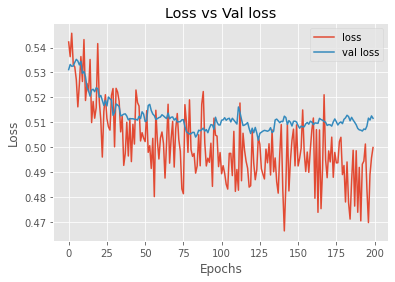

In [148]:
dict_histV5_3 = histV5_3.history
plot_loss(dict_histV5_3)

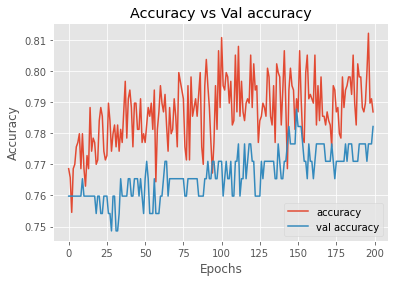

In [149]:
plot_accu(dict_histV5_3)

### Testing (Attempt 3)

In [150]:
test_loss , test_acc = modelV5.evaluate(predictors_norm_test , target_norm_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7986


In [151]:
result = modelV5.predict(predictors_test)
output = pd.DataFrame({"PassengerID" : df[892:]["PassengerId"], "Survived (Prediction)" : predict_state(result), "Survived (Real)": df[892:]["survived"].values} )
output # Final result

14/14 [==============================] - 0s 4ms/step


,PassengerID,Survived (Prediction),Survived (Real)
851,852.0,0,1.0
1161,1162.0,0,0.0
1065,1066.0,0,0.0
913,914.0,0,1.0
799,800.0,0,0.0
...,...,...,...
699,700.0,0,0.0
1280,1281.0,0,0.0
1213,1214.0,0,0.0
640,641.0,1,0.0


In [152]:
modelV5.save("/content/drive/MyDrive/Colab_models/modelV5_3_1D_cop1.h5") #V5 ,1st attempt, 1st download
output.to_csv("/content/drive/MyDrive/Data/output_V5_3_1D_cop1.csv" , index = False, encoding= "utf-8")